In [1]:
import lightkurve as lk
import giants as g
import numpy as np

In [2]:
tic = 52106348

In [3]:
lcc = g.Giant().from_eleanor(tic)

Creating light curve for target 52106348 for sectors [9].


100%|██████████| 1154/1154 [00:13<00:00, 86.99it/s]


In [4]:
lc = lcc[1]

In [5]:
pg = lc.remove_outliers().to_periodogram()

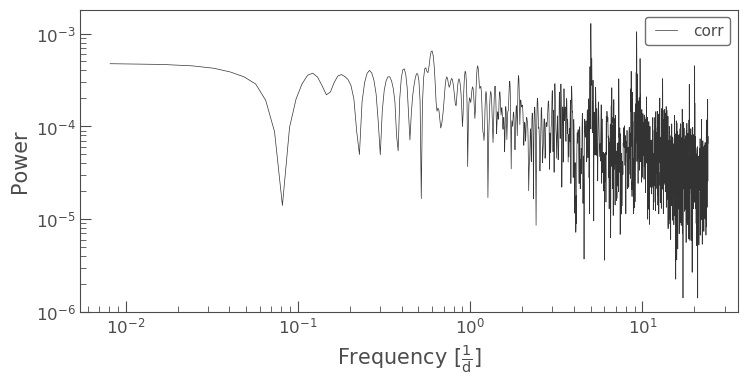

In [6]:
pg.plot(scale='log')

In [7]:
seismology = pg.to_seismology()

/Users/nksaunders/Documents/Github/lightkurve/lightkurve/seismology/core.py:60: LightkurveWarning: Seismology received a periodogram which does not appear to have been background-corrected. Please consider calling `periodogram.flatten()` prior to extracting seismological parameters.
  LightkurveWarning)


In [8]:
seismology.estimate_numax()

numax: 5.02 1 / d (method: ACF2D)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x140fe9940>,
      dtype=object)

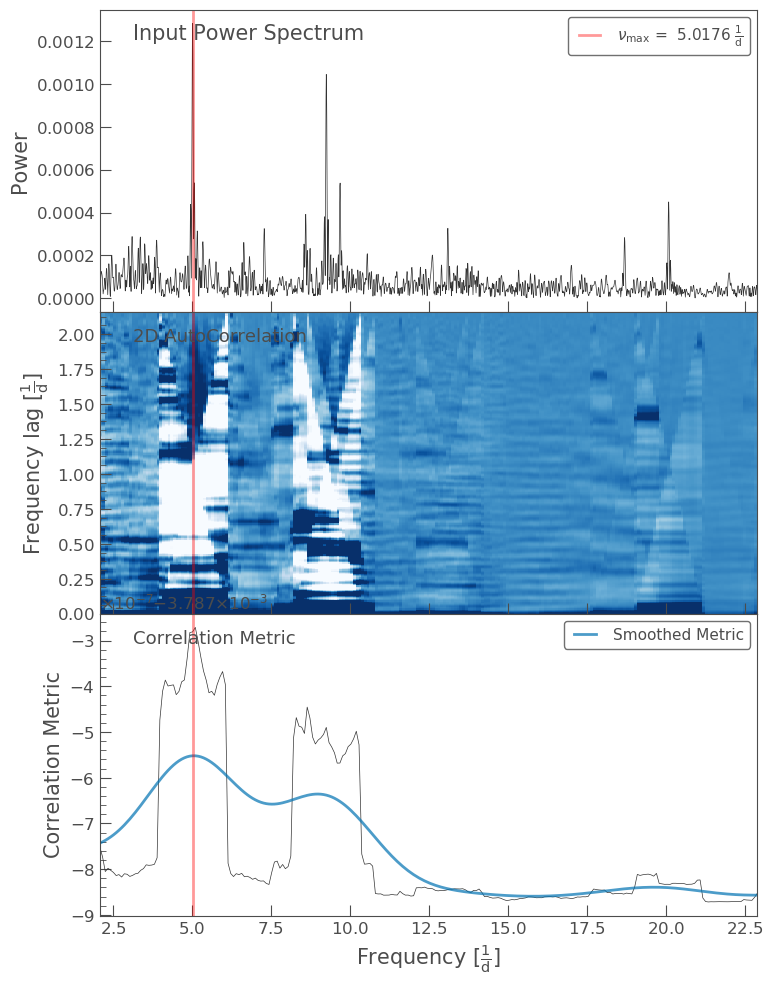

In [9]:
seismology.diagnose_numax()